<a href="https://colab.research.google.com/github/Samir-Doghmi/Data_Science_Lab/blob/main/Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path="/content/drive/MyDrive/Colab Notebooks/sportit.csv"
df= pd.read_csv(path, sep= ";", parse_dates=['data'])
df.head()

ValueError: ignored

In [ ]:
df.shape

(378243, 7)

In [ ]:
df.describe()

,id,qta,prezzo
count,378243.000000,378243.000000,378243.000000
mean,204973.595810,1.262805,185.199245
std,117113.499389,2.511549,306.073701
min,1.000000,-19.000000,0.000000
25%,104143.500000,1.000000,25.606000
50%,206405.000000,1.000000,70.210000
75%,306715.500000,1.000000,247.387000
max,404895.000000,1152.000000,47982.340000


In [ ]:
df.columns

Index(['id', 'marchio', 'descrizione', 'settore', 'qta', 'prezzo', 'data',
       'Data', 'Time', 'Anno', 'Mese', 'Giorno', 'Settimana'],
      dtype='object')

# Data exploration

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378243 entries, 0 to 378242
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   id                      378243 non-null  int64         
 1   marchio                 378243 non-null  string        
 2   descrizione             378243 non-null  string        
 3   settore                 378243 non-null  string        
 4   qta                     378243 non-null  int64         
 5   prezzo                  378243 non-null  float64       
 6   Data                    378243 non-null  datetime64[ns]
 7   Anno                    378243 non-null  int64         
 8   Mese                    378243 non-null  int64         
 9   Giorno                  378243 non-null  int64         
 10  Settimana               378243 non-null  int64         
 11  Giorno_della_settimana  378243 non-null  object        
dtypes: datetime64[ns](1), float64(

In [ ]:
# we convert marchio, descrizione and settore to string variables
df[['marchio','descrizione','settore']] = df[['marchio','descrizione','settore']].astype(pd.StringDtype())

In [ ]:
# we convert data as date type and delete the original. Fallo solo una volta sennò impazzisce, l'ho isolato qua apposta
df['Data'] = (df['data']).dt.date.astype('datetime64[ns]')
#df['Time'] = df['data'].dt.time
df['Time'] = df['data'].dt.strftime('%H:%M:%S')

In [ ]:
#df['Time'] = pd.to_datetime(df['data']).dt.time
df['Anno'] = (df['Data']).dt.year
df['Mese'] = (df['data']).dt.month
df['Giorno'] = (df['data']).dt.day
df['Settimana'] = df.data.apply(lambda x: x.weekofyear)

giorni_settimana = ['lunedì', 'martedì', 'mercoledì', 'giovedì', 'venerdì', 'sabato', 'domenica']

df['Giorno_della_settimana'] = df['Data'].dt.weekday.map(dict(enumerate(giorni_settimana)))
df = df.drop(['data'], axis=1)

#remove microsecond
# df['Time'] = df['Time'].apply(lambda x: x.replace(microsecond=0))
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S')
df

,id,marchio,descrizione,settore,qta,prezzo,Data,Time,Anno,Mese,Giorno,Settimana,Giorno_della_settimana
0,37586,Protest,Pantalone imbottito,Snowboard,1,408.870,2015-04-24,1900-01-01 12:32:12,2015,4,24,17,venerdì
1,43076,Nike,Neutre,Running,1,582.330,2015-06-22,1900-01-01 23:43:55,2015,6,22,26,lunedì
2,36396,Nike,Pallone,Calcio,1,103.250,2015-04-11,1900-01-01 02:10:58,2015,4,11,15,sabato
3,39259,Skechers,Scarpa,Fitness,1,329.987,2015-05-14,1900-01-01 20:30:03,2015,5,14,20,giovedì
4,41154,Adidas,Pantaloncino ufficiale,Calcio,1,45.430,2015-06-05,1900-01-01 12:39:46,2015,6,5,23,venerdì
...,...,...,...,...,...,...,...,...,...,...,...,...,...
378238,404884,Shimano,Esche artificiali,Pesca,1,24.367,2023-04-04,1900-01-01 14:38:55,2023,4,4,14,martedì
378239,404885,Shimano,Esche artificiali,Pesca,1,24.367,2023-04-04,1900-01-01 14:38:55,2023,4,4,14,martedì
378240,404886,Dohna,Esche artificiali,Pesca,1,35.105,2023-04-04,1900-01-01 14:38:55,2023,4,4,14,martedì
378241,404894,Bodyline,Cardiofrequenzimetro,Running,1,218.064,2023-04-04,1900-01-01 18:38:47,2023,4,4,14,martedì


In [ ]:
df['Time'] = df['Time'].dt.time

In [ ]:
df

,id,marchio,descrizione,settore,qta,prezzo,Data,Time,Anno,Mese,Giorno,Settimana,Giorno_della_settimana
0,37586,Protest,Pantalone imbottito,Snowboard,1,408.870,2015-04-24,12:32:12,2015,4,24,17,venerdì
1,43076,Nike,Neutre,Running,1,582.330,2015-06-22,23:43:55,2015,6,22,26,lunedì
2,36396,Nike,Pallone,Calcio,1,103.250,2015-04-11,02:10:58,2015,4,11,15,sabato
3,39259,Skechers,Scarpa,Fitness,1,329.987,2015-05-14,20:30:03,2015,5,14,20,giovedì
4,41154,Adidas,Pantaloncino ufficiale,Calcio,1,45.430,2015-06-05,12:39:46,2015,6,5,23,venerdì
...,...,...,...,...,...,...,...,...,...,...,...,...,...
378238,404884,Shimano,Esche artificiali,Pesca,1,24.367,2023-04-04,14:38:55,2023,4,4,14,martedì
378239,404885,Shimano,Esche artificiali,Pesca,1,24.367,2023-04-04,14:38:55,2023,4,4,14,martedì
378240,404886,Dohna,Esche artificiali,Pesca,1,35.105,2023-04-04,14:38:55,2023,4,4,14,martedì
378241,404894,Bodyline,Cardiofrequenzimetro,Running,1,218.064,2023-04-04,18:38:47,2023,4,4,14,martedì


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378243 entries, 0 to 378242
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   id           378243 non-null  int64         
 1   marchio      378243 non-null  string        
 2   descrizione  378243 non-null  string        
 3   settore      378243 non-null  string        
 4   qta          378243 non-null  int64         
 5   prezzo       378243 non-null  float64       
 6   data         378243 non-null  datetime64[ns]
 7   Data         378243 non-null  datetime64[ns]
 8   Time         378243 non-null  object        
 9   Anno         378243 non-null  int64         
 10  Mese         378243 non-null  int64         
 11  Giorno       378243 non-null  int64         
 12  Settimana    378243 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(6), object(1), string(3)
memory usage: 37.5+ MB


In [ ]:
# we notice that some rows have a negative qta value. They are clearly incosistent values, so we dropped them
df.loc[df["qta"] < 0, ['marchio', 'descrizione', 'settore', 'qta']]
df = df.loc[df["qta"] >= 0]

In [ ]:
# which department sells more in the ecommerce?
df.groupby('settore')['qta'].sum().sort_values(ascending=False)

settore
Pesca              232692
Calcio              83297
Fitness             50953
Casual              41372
Running             12139
Tennis               9365
Sci                  7078
Trekking             6182
Bambino              5837
Padel                5440
Snowboard            5232
Mare                 4454
Ciclismo             4209
Nuoto                3289
Basket               2399
Ping-pong             926
Volley                776
Subacquea             455
Pattini               393
Arti marziali         294
Skateboard            248
Rugby                 146
Baseball              134
Danza                 124
Arceria                93
Freccette              78
Golf                   62
Buoni / acconti        60
Intimo                  9
Soft air                5
Name: qta, dtype: int64

In [ ]:
# what is the product most sold in the ecommerce?
ok = df.groupby(['marchio','descrizione','settore'] )['qta'].sum().sort_values(ascending=False)
ok.head(40)

marchio           descrizione             settore
Bodyline          Peso                    Fitness    14166
Pdx Sport         Calze  sportive         Calcio     11116
Rapture           Esche artificiali       Pesca      10203
Dynamite Baits    Boilies                 Pesca       8427
Molix             Esche artificiali       Pesca       5902
Korda             Minuteria               Pesca       5781
Adidas            Scarpa                  Casual      5324
Fassa             Bombarda                Pesca       4730
Shimano           Mulinelli               Pesca       4706
Nike              Scarpa                  Casual      4626
Trabucco          Fili e filati           Pesca       4327
Planetex          Pigiama                 Calcio      4266
Dunlop            Pallina                 Tennis      4249
Trabucco          Mulinelli               Pesca       4227
Nash              Boilies                 Pesca       4046
Adidas Originals  Scarpa                  Casual      3813
Dynami

In [ ]:
# what is the product most sold for each department?
ok.loc[ok.groupby('settore').idxmax()].sort_values(ascending=False)

marchio         descrizione              settore        
Bodyline        Peso                     Fitness            14166
Pdx Sport       Calze  sportive          Calcio             11116
Rapture         Esche artificiali        Pesca              10203
Adidas          Scarpa                   Casual              5324
Dunlop          Pallina                  Tennis              4249
Babolat         Pallina                  Padel               1465
On Bike         Pompa                    Ciclismo            1167
Nike            Neutre                   Running              781
Tecnica         Doposci                  Sci                  777
Havaianas       Infradito                Mare                 742
Olang           Scarpa                   Trekking             555
Bodyline        Pallina                  Ping-pong            491
                Cuffia                   Nuoto                480
Champion        Felpe                    Bambino              396
Bodyline        Can

### Handling Missing Values

In [ ]:
# From a first glance, it seems that there are no missing values
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
id,0,0.0
marchio,0,0.0
descrizione,0,0.0
settore,0,0.0
qta,0,0.0
prezzo,0,0.0
Data,0,0.0
Time,0,0.0
Anno,0,0.0
Mese,0,0.0


In [ ]:
df

,id,marchio,descrizione,settore,qta,prezzo,Data,Time,Anno,Mese,Giorno,Settimana,Giorno_della_settimana
0,37586,Protest,Pantalone imbottito,Snowboard,1,408.870,2015-04-24,1900-01-01 12:32:12,2015,4,24,17,venerdì
1,43076,Nike,Neutre,Running,1,582.330,2015-06-22,1900-01-01 23:43:55,2015,6,22,26,lunedì
2,36396,Nike,Pallone,Calcio,1,103.250,2015-04-11,1900-01-01 02:10:58,2015,4,11,15,sabato
3,39259,Skechers,Scarpa,Fitness,1,329.987,2015-05-14,1900-01-01 20:30:03,2015,5,14,20,giovedì
4,41154,Adidas,Pantaloncino ufficiale,Calcio,1,45.430,2015-06-05,1900-01-01 12:39:46,2015,6,5,23,venerdì
...,...,...,...,...,...,...,...,...,...,...,...,...,...
378238,404884,Shimano,Esche artificiali,Pesca,1,24.367,2023-04-04,1900-01-01 14:38:55,2023,4,4,14,martedì
378239,404885,Shimano,Esche artificiali,Pesca,1,24.367,2023-04-04,1900-01-01 14:38:55,2023,4,4,14,martedì
378240,404886,Dohna,Esche artificiali,Pesca,1,35.105,2023-04-04,1900-01-01 14:38:55,2023,4,4,14,martedì
378241,404894,Bodyline,Cardiofrequenzimetro,Running,1,218.064,2023-04-04,1900-01-01 18:38:47,2023,4,4,14,martedì


In [ ]:
#Now we focus on the column prezzo. how many times is the price equal to zero?
no_price= df[df['prezzo'] == 0]
print(len(no_price))
no_price.groupby(['marchio','descrizione','settore'])['qta'].count().sort_values(ascending=False)

1825


marchio            descrizione          settore  
Happy Runner Club  Canotta              Running      730
                   Short                Running      493
                   Vario                Running      493
Pdx Sport          Calze  sportive      Calcio        56
Happy Runner Club  Varie abbigliamento  Running       48
Adidas             Vario                Calcio         1
Bodyline           Pallone              Volley         1
Dc Shoes           Scarpa               Snowboard      1
Happy Runner Club  T.shirt m/m          Running        1
Shimano            Mulinelli            Pesca          1
Name: qta, dtype: int64

In [ ]:
# our objective is to compute the percentage of zero value price for each product. In order to do so, we need to count the total items
si_price= df[df['prezzo'] != 0]
print(len(no_price))

1825


In [ ]:
# we encoded a new column with value 1 if the article has a zero price value
df.loc[df['prezzo'] == 0 , 'check'] = 1
df['check'].unique()
df

,id,marchio,descrizione,settore,qta,prezzo,Data,Time,Anno,Mese,Giorno,Settimana,Giorno_della_settimana,check
0,37586,Protest,Pantalone imbottito,Snowboard,1,408.870,2015-04-24,12:32:12,2015,4,24,17,venerdì,NaN
1,43076,Nike,Neutre,Running,1,582.330,2015-06-22,23:43:55,2015,6,22,26,lunedì,NaN
2,36396,Nike,Pallone,Calcio,1,103.250,2015-04-11,02:10:58,2015,4,11,15,sabato,NaN
3,39259,Skechers,Scarpa,Fitness,1,329.987,2015-05-14,20:30:03,2015,5,14,20,giovedì,NaN
4,41154,Adidas,Pantaloncino ufficiale,Calcio,1,45.430,2015-06-05,12:39:46,2015,6,5,23,venerdì,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378238,404884,Shimano,Esche artificiali,Pesca,1,24.367,2023-04-04,14:38:55,2023,4,4,14,martedì,NaN
378239,404885,Shimano,Esche artificiali,Pesca,1,24.367,2023-04-04,14:38:55,2023,4,4,14,martedì,NaN
378240,404886,Dohna,Esche artificiali,Pesca,1,35.105,2023-04-04,14:38:55,2023,4,4,14,martedì,NaN
378241,404894,Bodyline,Cardiofrequenzimetro,Running,1,218.064,2023-04-04,18:38:47,2023,4,4,14,martedì,NaN


In [ ]:
# we group the number of items by the marchio, descrizione and settore columns. In the df2 dataset, we store the count of value of the column check according to the same patterns as the previous code. Then we join the dataframes obtained into a new one, called joined.
df3= df.groupby(['marchio', 'descrizione','settore' ], as_index=False).agg({'qta': 'count'})
df2 = df.groupby(['marchio', 'descrizione','settore' ], as_index=False).agg({'check': 'count'})
joined=pd.merge(df2,df3, left_on=['marchio', 'descrizione','settore'], right_on=['marchio', 'descrizione','settore'])

In [ ]:
joined.sort_values('qta', ascending= False)

,marchio,descrizione,settore,check,qta
2722,Rapture,Esche artificiali,Pesca,0,9490
990,Dynamite Baits,Boilies,Pesca,0,5894
2031,Molix,Esche artificiali,Pesca,0,5493
2493,Pdx Sport,Calze sportive,Calcio,56,5296
101,Adidas,Scarpa,Casual,0,5249
...,...,...,...,...,...
1577,Jail Jam,Cappelli,Casual,0,1
3160,Tap-In,Gonna,Padel,0,1
1581,Jmc,Borse,Pesca,0,1
1583,Jmc,Canne da pesca,Pesca,0,1


In [ ]:
#We create a new column called 'percentage' calculated as follows to obtain the percentage of articles with a ero price for each article in the shop.
joined['percentuale']= (joined['check']/joined['qta'])*100
joined1= joined.sort_values('percentuale', ascending= False).round(decimals=2)
joined1.head(15)

,marchio,descrizione,settore,check,qta,percentuale
1466,Happy Runner Club,Vario,Running,493,506,97.43
1460,Happy Runner Club,Canotta,Running,730,779,93.71
1462,Happy Runner Club,Short,Running,493,534,92.32
1465,Happy Runner Club,Varie abbigliamento,Running,48,83,57.83
1464,Happy Runner Club,T.shirt m/m,Running,1,33,3.03
2493,Pdx Sport,Calze sportive,Calcio,56,5296,1.06
897,Dc Shoes,Scarpa,Snowboard,1,139,0.72
468,Bodyline,Pallone,Volley,1,193,0.52
151,Adidas,Vario,Calcio,1,222,0.45
3003,Shimano,Mulinelli,Pesca,1,4017,0.02


In [ ]:
# dealing with missing values of brand Happy Runner Club items
marchio1= df[df['marchio'] == "Happy Runner Club"]
marchio1_0=marchio1['descrizione'].unique()
marchio1_0

<StringArray>
[           'Canotta ',               'Vario',               'Short',
 'Varie abbigliamento',         'T.shirt m/l',         'T.shirt m/m',
             'Cuffia ']
Length: 7, dtype: string

In [ ]:
marchio1.groupby(['marchio','descrizione'])['prezzo'].mean()

marchio            descrizione        
Happy Runner Club  Canotta                  4.772668
                   Cuffia                  37.170000
                   Short                    2.248220
                   T.shirt m/l            144.550000
                   T.shirt m/m             92.530773
                   Varie abbigliamento     67.661840
                   Vario                    1.478556
Name: prezzo, dtype: float64

In [ ]:
a= df[(df['marchio'] == 'Adidas') & (df['descrizione'] == 'Pantaloncino ufficiale') & (df['settore'] == 'Calcio')]
a

,id,marchio,descrizione,settore,qta,prezzo,Data,Time,Anno,Mese,Giorno,Settimana,Giorno_della_settimana,check
4,41154,Adidas,Pantaloncino ufficiale,Calcio,1,45.430,2015-06-05,1900-01-01 12:39:46,2015,6,5,23,venerdì,NaN
149,41155,Adidas,Pantaloncino ufficiale,Calcio,1,45.430,2015-06-05,1900-01-01 12:39:46,2015,6,5,23,venerdì,NaN
150,41156,Adidas,Pantaloncino ufficiale,Calcio,4,45.430,2015-06-05,1900-01-01 12:39:46,2015,6,5,23,venerdì,NaN
151,41157,Adidas,Pantaloncino ufficiale,Calcio,1,45.430,2015-06-05,1900-01-01 12:39:46,2015,6,5,23,venerdì,NaN
508,41322,Adidas,Pantaloncino ufficiale,Calcio,2,45.430,2015-06-06,1900-01-01 17:02:49,2015,6,6,23,sabato,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342967,363145,Adidas,Pantaloncino ufficiale,Calcio,1,164.787,2021-12-06,1900-01-01 13:58:42,2021,12,6,49,lunedì,NaN
355879,397785,Adidas,Pantaloncino ufficiale,Calcio,1,156.940,2023-01-13,1900-01-01 15:07:23,2023,1,13,2,venerdì,NaN
359977,392792,Adidas,Pantaloncino ufficiale,Calcio,1,185.850,2022-11-23,1900-01-01 17:08:17,2022,11,23,47,mercoledì,NaN
364385,393330,Adidas,Pantaloncino ufficiale,Calcio,1,185.850,2022-11-27,1900-01-01 23:29:29,2022,11,27,47,domenica,NaN


# Some Graphs

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
import numpy as np

In [ ]:
# we only consider rows with a price other than 0. In addition, we create a new column Sales as the result of multiplying qta and price.
si_price["Sales"] = si_price.iloc[:, 4] * si_price.iloc[:, 5]

# analyse sales for every purchase
sector_sales = si_price.groupby('settore')['Sales'].describe()
sector_sales

<ipython-input-14-6a9308da848a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  si_price["Sales"] = si_price.iloc[:, 4] * si_price.iloc[:, 5]


,count,mean,std,min,25%,50%,75%,max
settore,,,,,,,,
Arceria,64.0,31.801000,41.805357,11.9770,11.9770,11.9770,24.3670,243.6700
Arti marziali,274.0,123.563722,95.744181,0.0000,40.8870,111.5100,189.5670,764.0500
Bambino,5795.0,187.440289,185.848778,-1668.9330,82.1870,135.8770,206.0870,1668.9330
Baseball,117.0,70.981992,47.071581,5.4516,57.4070,61.5370,74.6291,362.9444
Basket,2314.0,226.298424,178.569473,0.0000,103.2500,214.7600,288.6870,5096.4200
Buoni / acconti,43.0,339.908605,290.644672,103.2500,206.5000,206.5000,413.0000,1474.4100
Calcio,61059.0,247.214839,338.457095,-7140.7700,74.3400,152.3970,329.9870,29347.9865
Casual,40658.0,336.008433,273.306153,-13195.3500,206.0870,309.7500,392.3500,14661.5000
Ciclismo,3500.0,111.119186,2434.648620,0.0413,40.8870,51.2120,65.2540,143947.0200


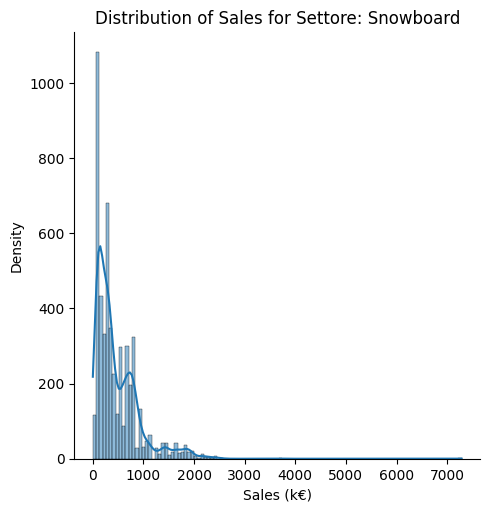

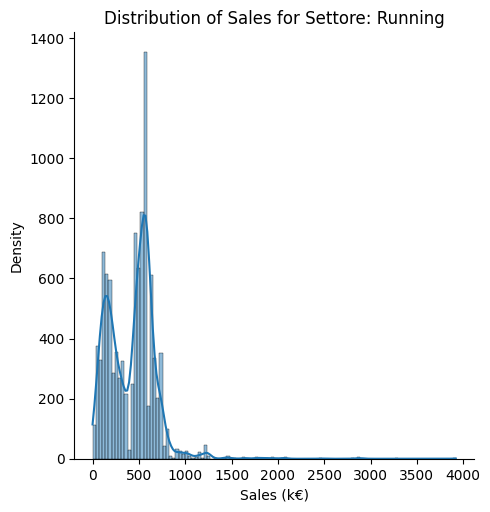

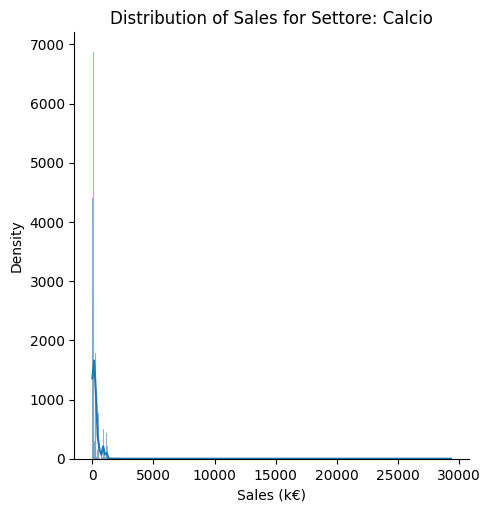

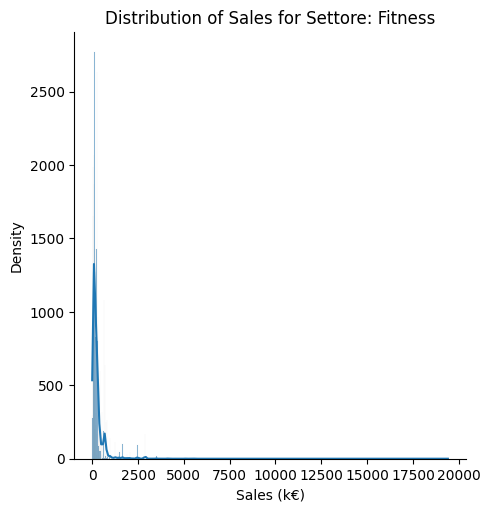

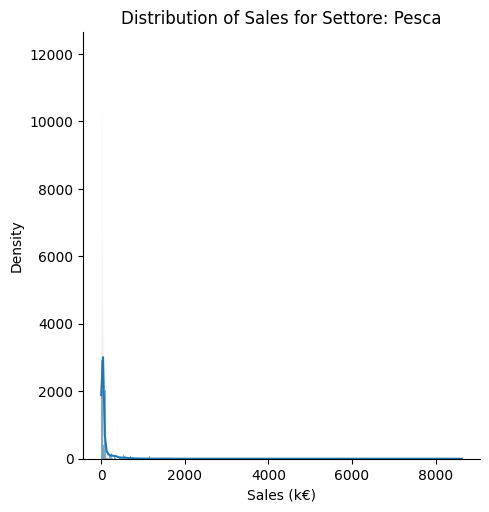

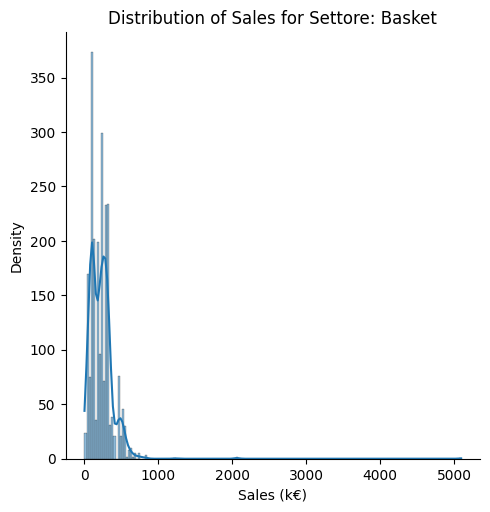

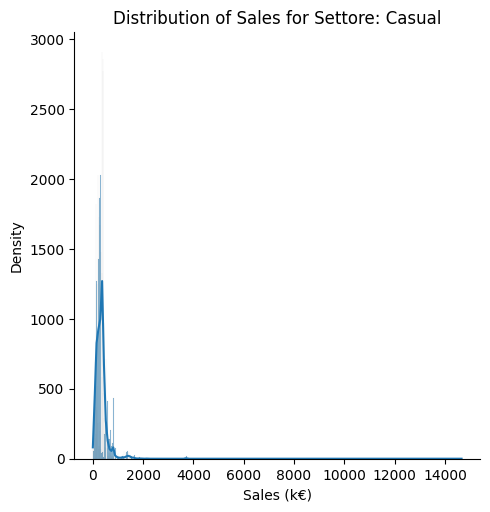

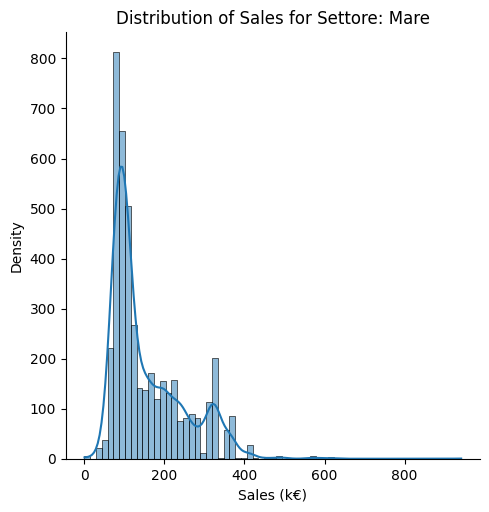

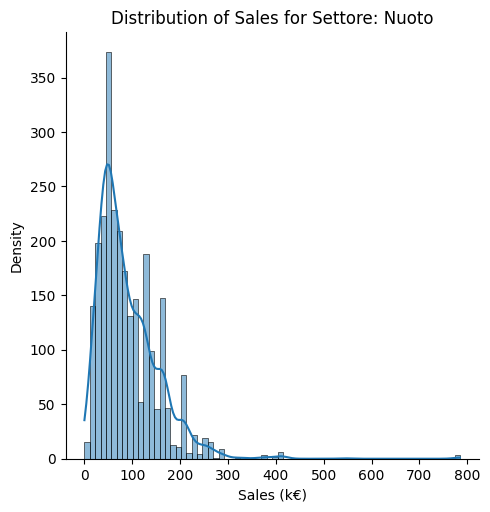

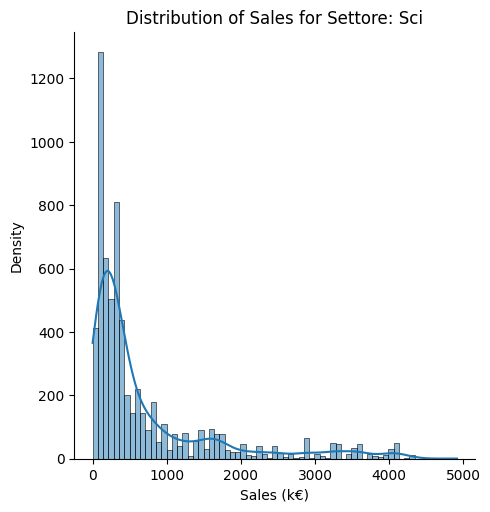

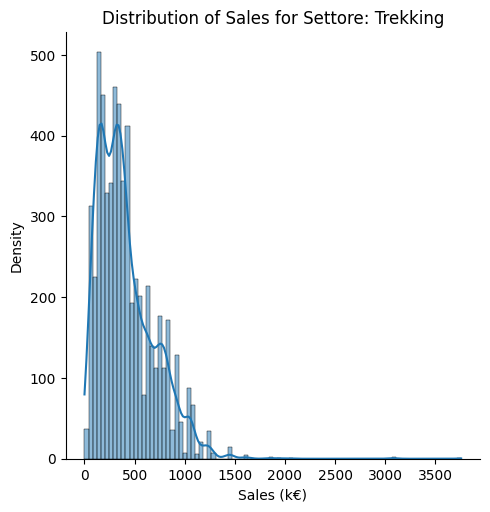

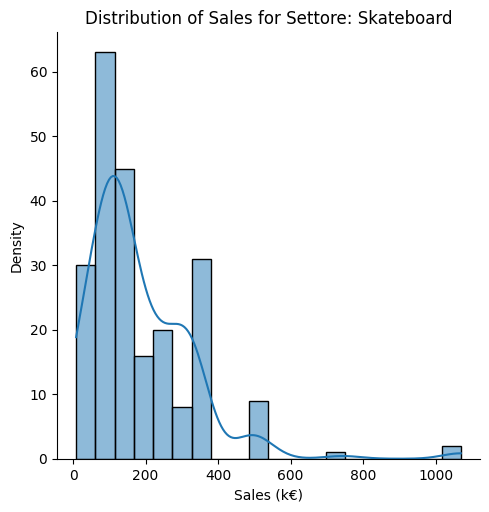

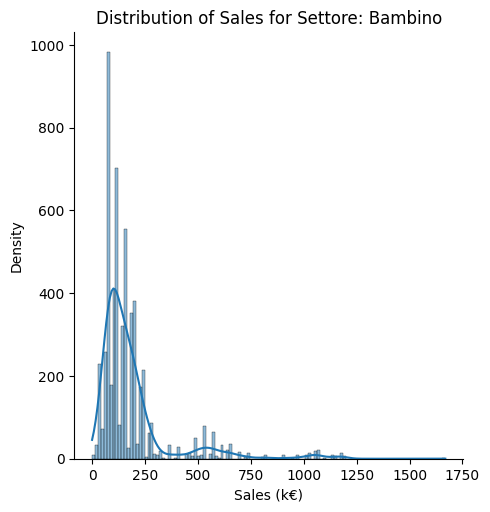

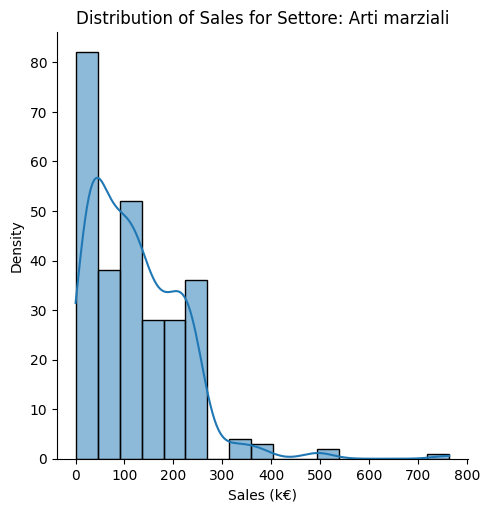

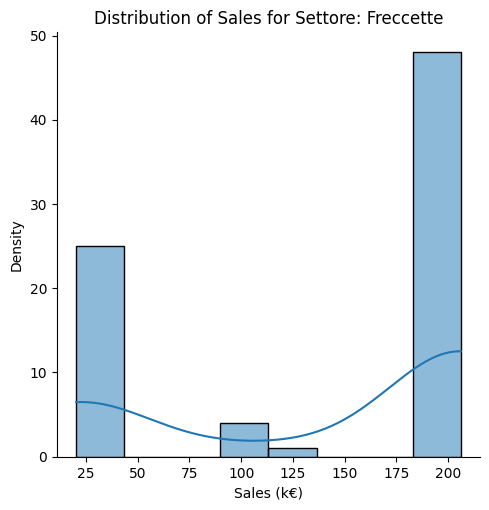

KeyboardInterrupt: ignored

In [ ]:
si_prices = si_price[['settore', 'Sales']]

for settore in si_prices['settore'].unique():
    subset_data = si_prices[si_prices['settore'] == settore]
    sns.displot(data=subset_data, x='Sales', kde=True)
    plt.xlabel('Sales')
    plt.ylabel('Density')
    plt.title(f'Distribution of Sales for Settore: {settore}')
    plt.show()





In [ ]:
# we adjust the unit of measurement of sales


new = si_price.groupby(['Anno', 'Mese'],as_index=False)['Sales'].sum()

# we add a column in which we enter the corresponding month and year, after aggregating the entries for each monthly-year period
new['Anno_Mese'] = new['Anno'].astype(str) + '-' + new['Mese'].astype(str).str.zfill(2)
new.sort_values(by=['Sales'] ,ascending=False).head(15)

,Anno,Mese,Sales,Anno_Mese
87,2020,3,2.073327e+06,2020-03
88,2020,4,1.687108e+06,2020-04
73,2019,1,1.180849e+06,2019-01
103,2021,7,1.117242e+06,2021-07
61,2018,1,1.109951e+06,2018-01
49,2017,1,1.034707e+06,2017-01
60,2017,12,1.007513e+06,2017-12
97,2021,1,9.963608e+05,2021-01
48,2016,12,9.905842e+05,2016-12
121,2023,1,9.784529e+05,2023-01


In [ ]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Anno       125 non-null    int64  
 1   Mese       125 non-null    int64  
 2   Sales      125 non-null    float64
 3   Anno_Mese  125 non-null    object 
dtypes: float64(1), int64(2), object(1)
memory usage: 4.0+ KB


In [ ]:
# we set datetime index by considering Anno_mese e we drop the columns Anno, Mese, and Anno_Mese and Fatturato
tdi = pd.DatetimeIndex(new.Anno_Mese)
new.set_index(tdi, inplace=True)
new = new.drop(['Anno','Mese','Anno_Mese'], axis=1)
new.sort_values(by='Sales', ascending= False).head(15)

,Sales
Anno_Mese,
2020-03-01,2.073327e+06
2020-04-01,1.687108e+06
2019-01-01,1.180849e+06
2021-07-01,1.117242e+06
2018-01-01,1.109951e+06
2017-01-01,1.034707e+06
2017-12-01,1.007513e+06
2021-01-01,9.963608e+05
2016-12-01,9.905842e+05


We can observe that March and April of 2020 are the months in which users purchased the most. This time period corresponds to the first Dpcm announced by the Italian authorities with the discovery of patience 1.
 On 9 March, restrictions were set for the whole country. On 22 March, however,
a new Dpcm set new tight limits: non-essential or strategic shops were also closed. Only grocery shops, pharmacies, convenience stores and essential services remained open. This emergency condition has been extended until 16 May.

 However, as can be seen, the Coronavirus pandemic has disrupted consumer behaviour and e-commerce has remained a steady alternative to in-store shopping.

Text(0, 0.5, 'Sales')

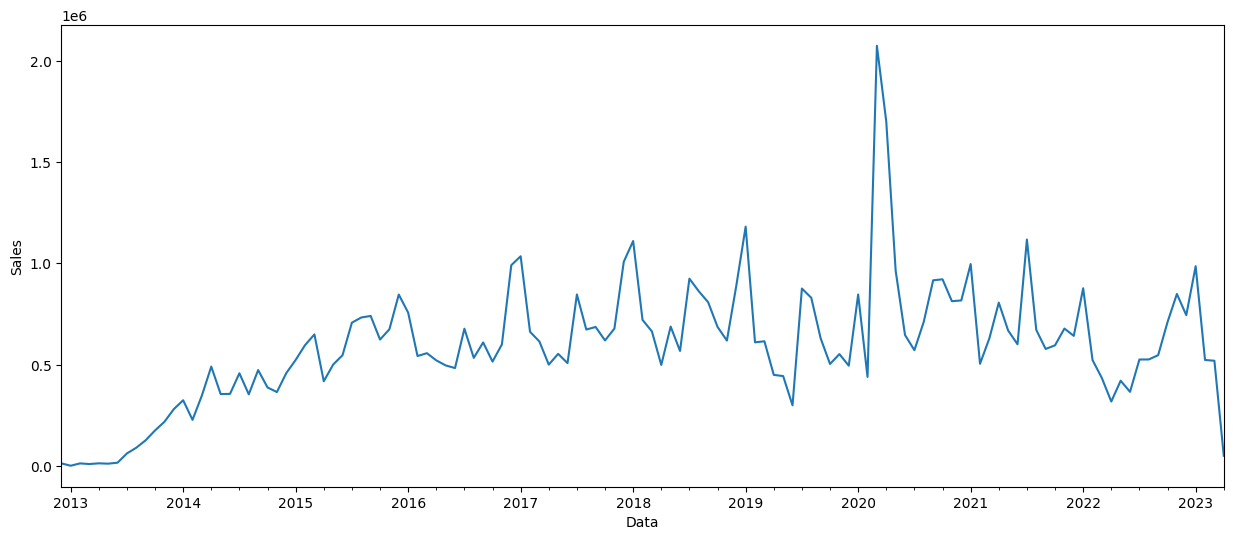

In [ ]:
# we  draw a graph representing sales in the period 2013-2023
y = new['Sales']
y.plot(figsize=(15, 6))
plt.xlabel('Data')
plt.ylabel('Sales')

In [ ]:
result = seasonal_decompose(new, model='additive')
result

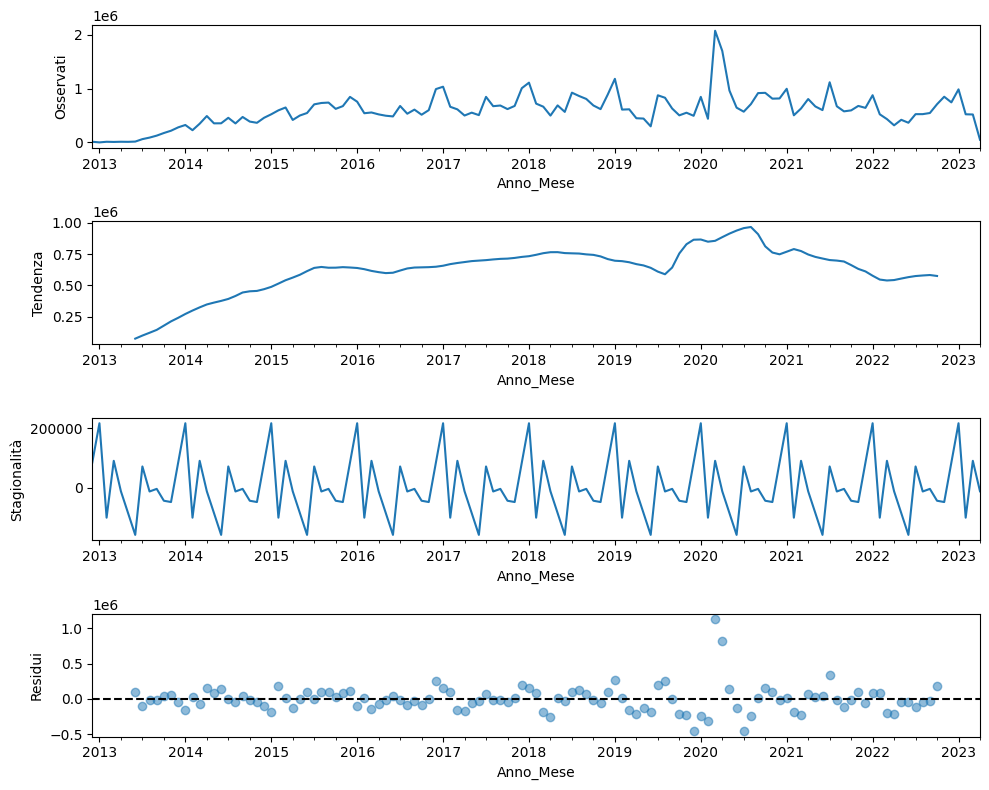

In [ ]:
# assuming an additive model, we plote 4 resulting series
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 8))
result.observed.plot(ax=ax1)
ax1.set_ylabel('Osservati')
result.trend.plot(ax=ax2)
ax2.set_ylabel('Tendenza')
result.seasonal.plot(ax=ax3)
ax3.set_ylabel('Stagionalità')
result.resid.plot(ax=ax4, marker='o',  linestyle='', alpha=0.5)
plt.axhline(0, color='black', linestyle='--')
ax4.set_ylabel('Residui')
plt.tight_layout()
plt.show()

In [ ]:
new1= si_price
new1['Time'] = pd.to_datetime(new1['Time'], format= '%H:%M:%S')
new1['Hour'] = new1['Time'].dt.hour

<ipython-input-17-62cfe35bd07b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new1['Time'] = pd.to_datetime(new1['Time'], format= '%H:%M:%S')
<ipython-input-17-62cfe35bd07b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new1['Hour'] = new1['Time'].dt.hour


In [ ]:
new1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 376418 entries, 0 to 378242
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   id                      376418 non-null  int64         
 1   marchio                 376418 non-null  string        
 2   descrizione             376418 non-null  string        
 3   settore                 376418 non-null  string        
 4   qta                     376418 non-null  int64         
 5   prezzo                  376418 non-null  float64       
 6   Data                    376418 non-null  datetime64[ns]
 7   Time                    376418 non-null  datetime64[ns]
 8   Anno                    376418 non-null  int64         
 9   Mese                    376418 non-null  int64         
 10  Giorno                  376418 non-null  int64         
 11  Settimana               376418 non-null  int64         
 12  Giorno_della_settimana  376418

In [ ]:
a1= si_price.groupby("settore", as_index= False)['Sales'].sum()
a1['Sales'] = (a1['Sales'].astype(float)/1000).round(2)
a1['Sales'] = a1['Sales'].astype(float)
a1 = a1.set_index('settore')

a1

,Sales
settore,
Arceria,2.04
Arti marziali,33.86
Bambino,1086.22
Baseball,8.30
Basket,523.65
Buoni / acconti,14.62
Calcio,15094.69
Casual,13661.43
Ciclismo,388.92


In [ ]:

#ax.plot(a1.index, a1['Sales_(k€)'], label=a1.index)
#plt.xlabel('Percentuale')
#plt.ylabel('Count')
#plt.title('Histogram of Percentuale')

# Add x-axis tick labels
#bin_edges = np.histogram(a1['percentuale'], bins=29)[1]

#plt.xticks(bin_centers, a1.index, rotation=90, fontsize=6)

#plt.show()

In [ ]:
# grafico
si_price
settore_fatturato= si_price.groupby(['settore', 'Data'], as_index= False)['Sales'].sum()
settore_fatturato

,settore,Data,Sales
0,Arceria,2012-12-18,82.187
1,Arceria,2013-12-16,20.650
2,Arceria,2014-07-01,164.374
3,Arceria,2014-07-02,82.187
4,Arceria,2014-07-24,11.977
...,...,...,...
32687,Volley,2023-02-11,329.987
32688,Volley,2023-02-12,103.250
32689,Volley,2023-03-03,1031.674
32690,Volley,2023-03-15,619.500


In [ ]:
tdi1 = pd.DatetimeIndex(settore_fatturato.Data)
settore_fatturato.set_index(tdi1, inplace=True)
settore_fatturato = settore_fatturato.drop(['Data'], axis=1)

In [ ]:
settore_fatturato

,settore,Sales
Data,,
2012-12-18,Arceria,82.187
2013-12-16,Arceria,20.650
2014-07-01,Arceria,164.374
2014-07-02,Arceria,82.187
2014-07-24,Arceria,11.977
...,...,...
2023-02-11,Volley,329.987
2023-02-12,Volley,103.250
2023-03-03,Volley,1031.674


In [ ]:
op= settore_fatturato.reset_index()
op.sort_values(by='Sales', ascending=False)

,Data,settore,Sales
13712,2020-03-23,Fitness,164158.0423
13708,2020-03-19,Fitness,158400.2854
13713,2020-03-24,Fitness,158301.6197
13709,2020-03-20,Fitness,151088.2856
11064,2021-08-14,Ciclismo,144204.3190
...,...,...,...
17983,2013-02-14,Pattini,0.4130
23575,2018-04-20,Running,0.0413
29626,2020-06-11,Tennis,0.0000
1658,2021-06-15,Bambino,0.0000


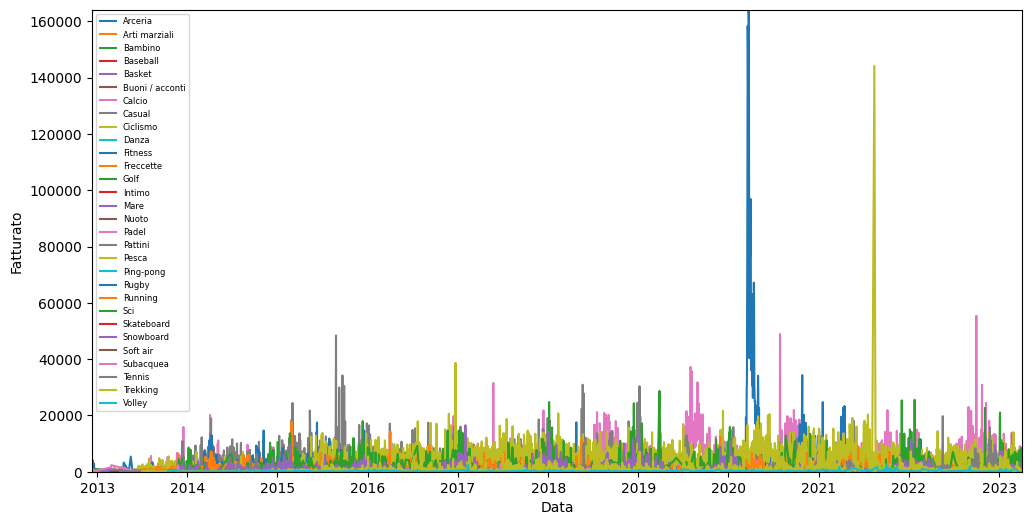

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))

# Loop through each sector and plot its trend
for sector in op['settore'].unique():
    sector_data = op[op['settore'] == sector]
    ax.plot(sector_data['Data'], sector_data['Sales'], label=sector)

# Set x and y axis labels
ax.set_xlabel('Data')
ax.set_ylabel('Fatturato')

# Add legend
ax.legend(loc=2, prop={'size': 6})
# Enable autoscaling on both axes
ax.autoscale(enable=True, axis='both', tight=True)
# Display the plot
plt.show()

We set new variables. In this approach, we try to find some patterns in the peaks of customer behavior.

## Covid

In [ ]:
path1="/content/drive/MyDrive/project of data science lab/0-DataSet_Ricoveri.csv"
covid= pd.read_csv(path1, sep= ",", parse_dates=['DATARICOVERO1'])

<ipython-input-19-fac2cf977b25>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  covid= pd.read_csv(path1, sep= ",", parse_dates=['DATARICOVERO1'])


In [ ]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1184 entries, 0 to 1183
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   DATARICOVERO1  1183 non-null   datetime64[ns]
 1   RICOVERI       1184 non-null   int64         
 2   iss_date       1184 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 27.9+ KB


In [ ]:
covid=covid.drop(['iss_date'], axis=1)

In [ ]:
covid=covid.drop(1183)

In [ ]:
covid

,DATARICOVERO1,RICOVERI
0,2020-02-20,91
1,2020-02-21,123
2,2020-02-22,108
3,2020-02-23,151
4,2020-02-24,192
...,...,...
1178,2023-05-13,83
1179,2023-05-14,64
1180,2023-05-15,99
1181,2023-05-16,44


In [ ]:
covid['DATARICOVERO1'] = (covid['DATARICOVERO1']).dt.date.astype('datetime64[ns]')

In [ ]:
si_price

,id,marchio,descrizione,settore,qta,prezzo,Data,Time,Anno,Mese,Giorno,Settimana,Giorno_della_settimana,Sales,Hour
0,37586,Protest,Pantalone imbottito,Snowboard,1,408.870,2015-04-24,1900-01-01 12:32:12,2015,4,24,17,venerdì,408.870,12
1,43076,Nike,Neutre,Running,1,582.330,2015-06-22,1900-01-01 23:43:55,2015,6,22,26,lunedì,582.330,23
2,36396,Nike,Pallone,Calcio,1,103.250,2015-04-11,1900-01-01 02:10:58,2015,4,11,15,sabato,103.250,2
3,39259,Skechers,Scarpa,Fitness,1,329.987,2015-05-14,1900-01-01 20:30:03,2015,5,14,20,giovedì,329.987,20
4,41154,Adidas,Pantaloncino ufficiale,Calcio,1,45.430,2015-06-05,1900-01-01 12:39:46,2015,6,5,23,venerdì,45.430,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378238,404884,Shimano,Esche artificiali,Pesca,1,24.367,2023-04-04,1900-01-01 14:38:55,2023,4,4,14,martedì,24.367,14
378239,404885,Shimano,Esche artificiali,Pesca,1,24.367,2023-04-04,1900-01-01 14:38:55,2023,4,4,14,martedì,24.367,14
378240,404886,Dohna,Esche artificiali,Pesca,1,35.105,2023-04-04,1900-01-01 14:38:55,2023,4,4,14,martedì,35.105,14
378241,404894,Bodyline,Cardiofrequenzimetro,Running,1,218.064,2023-04-04,1900-01-01 18:38:47,2023,4,4,14,martedì,218.064,18


In [ ]:
merged

,id,marchio,descrizione,settore,qta,prezzo,Data,Time,Anno,Mese,Giorno,Settimana,Giorno_della_settimana,Sales,Hour,RICOVERI
0,37586,Protest,Pantalone imbottito,Snowboard,1,408.870,2015-04-24,1900-01-01 12:32:12,2015,4,24,17,venerdì,408.870,12,NaN
1,43076,Nike,Neutre,Running,1,582.330,2015-06-22,1900-01-01 23:43:55,2015,6,22,26,lunedì,582.330,23,NaN
2,36396,Nike,Pallone,Calcio,1,103.250,2015-04-11,1900-01-01 02:10:58,2015,4,11,15,sabato,103.250,2,NaN
3,39259,Skechers,Scarpa,Fitness,1,329.987,2015-05-14,1900-01-01 20:30:03,2015,5,14,20,giovedì,329.987,20,NaN
4,41154,Adidas,Pantaloncino ufficiale,Calcio,1,45.430,2015-06-05,1900-01-01 12:39:46,2015,6,5,23,venerdì,45.430,12,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376413,404884,Shimano,Esche artificiali,Pesca,1,24.367,2023-04-04,1900-01-01 14:38:55,2023,4,4,14,martedì,24.367,14,189.0
376414,404885,Shimano,Esche artificiali,Pesca,1,24.367,2023-04-04,1900-01-01 14:38:55,2023,4,4,14,martedì,24.367,14,189.0
376415,404886,Dohna,Esche artificiali,Pesca,1,35.105,2023-04-04,1900-01-01 14:38:55,2023,4,4,14,martedì,35.105,14,189.0
376416,404894,Bodyline,Cardiofrequenzimetro,Running,1,218.064,2023-04-04,1900-01-01 18:38:47,2023,4,4,14,martedì,218.064,18,189.0


In [ ]:
merged = pd.merge(si_price, covid,  how='left', left_on=['Data'], right_on = ['DATARICOVERO1'])
merged=merged.drop(['DATARICOVERO1'], axis=1)

#merged['Ricoveri'] = merged['Ricoveri'].astype(int)

merged

KeyError: ignored

## Divido i settori in outdoor, indoor, squadra, invernali e abbigliamento

In [ ]:
merged["settore"] = merged["settore"].astype("category")
merged["settore"].cat.categories

Index(['Arceria', 'Arti marziali', 'Bambino', 'Baseball', 'Basket',
       'Buoni / acconti', 'Calcio', 'Casual', 'Ciclismo', 'Danza', 'Fitness',
       'Freccette', 'Golf', 'Intimo', 'Mare', 'Nuoto', 'Padel', 'Pattini',
       'Pesca', 'Ping-pong', 'Rugby', 'Running', 'Sci', 'Skateboard',
       'Snowboard', 'Soft air', 'Subacquea', 'Tennis', 'Trekking', 'Volley'],
      dtype='string')

In [ ]:
dict ={'Arceria':'Outdoor','Arti marziali':'Indoor','Bambino':'Abbigliamento','Baseball':'Squadra','Basket':'Squadra',
       'Buoni / acconti':'Buoni / acconti','Calcio':'Squadra','Casual':'Abbigliamento','Ciclismo':'Outdoor','Danza':'Indoor',
       'Fitness':'Indoor','Freccette':'Indoor','Golf':'Outdoor','Intimo':'Abbigliamento','Mare':'Abbigliamento',
       'Nuoto':'Indoor','Padel':'Indoor','Pattini':'Indoor','Pesca':'Outdoor','Ping-pong':'Indoor',
       'Rugby':'Squadra','Running':'Outdoor','Sci':'Invernale','Skateboard':'Outdoor','Snowboard':'Invernale',
       'Soft air':'Squadra','Subacquea':'Outdoor','Tennis':'Indoor','Trekking':'Outdoor','Volley':'Squadra'}

merged['categoria']=merged['settore'].apply(lambda x : dict[x])

In [ ]:
column_to_move = merged.pop("categoria")
merged.insert(4, "categoria", column_to_move)

In [ ]:
merged.head()

,id,marchio,descrizione,settore,categoria,qta,prezzo,Data,Time,Anno,Mese,Giorno,Settimana,Giorno_della_settimana,Sales,Hour,RICOVERI
0,37586,Protest,Pantalone imbottito,Snowboard,Invernale,1,408.870,2015-04-24,1900-01-01 12:32:12,2015,4,24,17,venerdì,408.870,12,NaN
1,43076,Nike,Neutre,Running,Outdoor,1,582.330,2015-06-22,1900-01-01 23:43:55,2015,6,22,26,lunedì,582.330,23,NaN
2,36396,Nike,Pallone,Calcio,Squadra,1,103.250,2015-04-11,1900-01-01 02:10:58,2015,4,11,15,sabato,103.250,2,NaN
3,39259,Skechers,Scarpa,Fitness,Indoor,1,329.987,2015-05-14,1900-01-01 20:30:03,2015,5,14,20,giovedì,329.987,20,NaN
4,41154,Adidas,Pantaloncino ufficiale,Calcio,Squadra,1,45.430,2015-06-05,1900-01-01 12:39:46,2015,6,5,23,venerdì,45.430,12,NaN


In [ ]:
result = merged.groupby('categoria')['settore'].unique().reset_index()
result['settore'] = result['settore'].apply(lambda x: ', '.join(x))
result

,categoria,settore
0,Abbigliamento,"Casual, Mare, Bambino, Intimo"
1,Buoni / acconti,Buoni / acconti
2,Indoor,"Fitness, Nuoto, Arti marziali, Freccette, Danz..."
3,Invernale,"Snowboard, Sci"
4,Outdoor,"Running, Pesca, Trekking, Skateboard, Ciclismo..."
5,Squadra,"Calcio, Basket, Volley, Baseball, Rugby, Soft air"


In [ ]:
merged['Time'] = merged['Time'].dt.time
merged

,id,marchio,descrizione,settore,categoria,qta,prezzo,Data,Time,Anno,Mese,Giorno,Settimana,Giorno_della_settimana,Sales,Hour,RICOVERI
0,37586,Protest,Pantalone imbottito,Snowboard,Invernale,1,408.870,2015-04-24,12:32:12,2015,4,24,17,venerdì,408.870,12,NaN
1,43076,Nike,Neutre,Running,Outdoor,1,582.330,2015-06-22,23:43:55,2015,6,22,26,lunedì,582.330,23,NaN
2,36396,Nike,Pallone,Calcio,Squadra,1,103.250,2015-04-11,02:10:58,2015,4,11,15,sabato,103.250,2,NaN
3,39259,Skechers,Scarpa,Fitness,Indoor,1,329.987,2015-05-14,20:30:03,2015,5,14,20,giovedì,329.987,20,NaN
4,41154,Adidas,Pantaloncino ufficiale,Calcio,Squadra,1,45.430,2015-06-05,12:39:46,2015,6,5,23,venerdì,45.430,12,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376413,404884,Shimano,Esche artificiali,Pesca,Outdoor,1,24.367,2023-04-04,14:38:55,2023,4,4,14,martedì,24.367,14,189.0
376414,404885,Shimano,Esche artificiali,Pesca,Outdoor,1,24.367,2023-04-04,14:38:55,2023,4,4,14,martedì,24.367,14,189.0
376415,404886,Dohna,Esche artificiali,Pesca,Outdoor,1,35.105,2023-04-04,14:38:55,2023,4,4,14,martedì,35.105,14,189.0
376416,404894,Bodyline,Cardiofrequenzimetro,Running,Outdoor,1,218.064,2023-04-04,18:38:47,2023,4,4,14,martedì,218.064,18,189.0


In [ ]:
# Set display options for pandas DataFrame
pd.set_option('display.max_rows', None)  # Display all rows
pd.set_option('display.max_colwidth', None)  # Display full column width

# Display the resulting DataFrame
with pd.option_context('display.expand_frame_repr', False):
    print(result)

         categoria                                                                             settore
0    Abbigliamento                                                       Casual, Mare, Bambino, Intimo
1  Buoni / acconti                                                                     Buoni / acconti
2           Indoor  Fitness, Nuoto, Arti marziali, Freccette, Danza, Tennis, Ping-pong, Pattini, Padel
3        Invernale                                                                      Snowboard, Sci
4          Outdoor            Running, Pesca, Trekking, Skateboard, Ciclismo, Subacquea, Golf, Arceria
5          Squadra                                   Calcio, Basket, Volley, Baseball, Rugby, Soft air


In [ ]:
# which is the category most sold
a = merged.groupby(['categoria'])['qta'].sum().sort_values(ascending=False)
a

categoria
Outdoor            254311
Squadra             86698
Indoor              70862
Abbigliamento       51672
Invernale           12309
Buoni / acconti        60
Name: qta, dtype: int64

In [ ]:
tot = merged['qta'].sum()
squadra = merged[merged['categoria'] == 'Squadra']['qta'].sum()
squadra/tot

0.1821723343811461

In [ ]:
tot_covid = b['qta'].sum()
squadra_covid = b[b['categoria'] == 'Squadra']['qta'].sum()
squadra_covid/tot_covid

0.17634435448395572

## Infine esporto il dataset

In [ ]:
gfg_csv_data = merged.to_csv('df_modified.csv', index = False)
print('\nCSV String:\n', gfg_csv_data)


CSV String:
 None
